In [ ]:
from vpython import *

ball = sphere(pos=vector(-5,0,0), radius=0.5,color=color.cyan)
wallR = box(pos=vector(6,0,0), size=vector(0.2,12,12), color=color.green)
ball.velocity = vector(25,0,0)
deltat = 0.005
t = 0
ball.pos = ball.pos + ball.velocity*deltat
while t < 3:
    rate(100)
    if ball.pos.x > wallR.pos.x:
        ball.velocity.x = -ball.velocity.x
    ball.pos = ball.pos + ball.velocity*deltat
    t = t + deltat 

[Image1]: ./Images/Spring-Pendulum.png "Problem diagram"

# Spring - Pendulum

![Problem diagram][Image1]


### Lagrangian Function

Taking the roof as the zero of gravitational potential ($V_{g} = 0$), we that the gravitational potential energy $V_{g}$ takes the form:

$$ V_{g} = - m g (L_{0} + L) \cos{\theta} $$

Where $L$ is the spring's elongation and $L_{0}$ is the spring's own length. Furthermore, the elastic energy $V_{k}$ associated with the spring's elongation takes the form:

$$ V_{k} = \frac{1}{2} k L^{2} $$

Moreover, the kinetic energy $T$ is:

$$ T = \frac{1}{2} m \left(\dot{r}^{2} + r^{2} \dot{\theta}^{2} \right) = \frac{1}{2} m \; \left( \dot{L}^{2} + (L_{0} + L)^{2} \dot{\theta}^{2} \right)$$

Where we have considered that $r = L_{0} + L$, so $\dot{r} = \dot{L} $. Then, the Lagrangian finally takes the form:

$$ \mathscr{L} = T - V = T - V_{g} - V_{k} = \frac{1}{2} m \; \left( \dot{L}^{2} + (L_{0} + L)^{2} \dot{\theta}^{2} \right) + m g (L_{0} + L) \cos{\theta} - \frac{1}{2} k L^{2} $$

### Equations of motion

Then the equations of motion are:

$$\frac{d}{dt} \left( \frac{\partial \mathscr{L}}{\partial \dot{L}} \right) - \frac{\partial \mathscr{L}}{\partial L} = 0 \quad \implies \quad \ddot{L} = (L_{0} + L) \dot{\theta}^{2} + g \cos{\theta} - \frac{k}{m} L$$

$$\frac{d}{dt} \left( \frac{\partial \mathscr{L}}{\partial \dot{\theta}} \right) - \frac{\partial \mathscr{L}}{\partial \theta} = 0 \quad \implies \quad \ddot{\theta} = - \frac{1}{(L_{0} + L)} \left[ \; g \sin{\theta} + 2 \dot{L} \dot{\theta} \; \right]$$

### Solve the system numerically

As a first approach, we will try to solve the system numerically. To make it, we have to reduce the order of the differential equations, changing from two differential equations of second order to four differential equations of first order.

Let:

$$ v = \dot{L} $$

$$ \omega = \dot{\theta} $$

So:

$$ \dot{L} = f_{1} (L, v, \theta, \omega, \mathrm{params}) = v $$

$$ \dot{\theta} = f_{2} (L, v, \theta, \omega, \mathrm{params}) = \omega$$

$$ \dot{v} = f_{3} (L, v, \theta, \omega, \mathrm{params}) = (L_{0} + L) \omega^{2} + g \cos{\theta} - \frac{k}{m} L $$

$$ \dot{\omega} = f_{4} (L, v, \theta, \omega, \mathrm{params}) = - \frac{1}{(L_{0} + L)} \left[ \; g \sin{\theta} + 2 v \omega \; \right] $$

Where we are working in space $( \; L \; , \; \theta \; , \; v \; , \; \omega \; )$ and $ \mathrm{params} = [ m, g, k, L_{0}]$

In order to plot real motion of the mass, take into account that:

$$ x = (L_{0} + L) \sin{\theta}$$

$$ y = - (L_{0} + L) \cos{\theta}$$

In [3]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import signal
from sympy import *

In [4]:
# Functions for solving differential equations and to define fluxes in phase portrait

def f1(L, v, theta, omega, m, g, k, Lo):
    return v

def f2(L, v, theta, omega, m, g, k, Lo):
    return omega

def f3(L, v, theta, omega, m, g, k, Lo):
    return (Lo + L) * omega**2 + g * np.cos(theta) - k/m * L

def f4(L, v, theta, omega, m, g, k, Lo):
    return - (g * np.sin(theta) + 2.0 * v * omega) / (Lo + L)

def dydt(y, t, m, g, k, Lo):
    
    L, theta, v, omega = y
    
    dL = f1(L, v, theta, omega, m, g, k, Lo)
    dtheta = f2(L, v, theta, omega, m, g, k, Lo)
    dv = f3(L, v, theta, omega, m, g, k, Lo)
    domega = f4(L, v, theta, omega, m, g, k, Lo)
    
    return [dL, dtheta, dv, domega]

Let's intend to search some interresting dynamic regime in the system, trying out with some values for the system's parameters

In [5]:
# Constant parameters
m = 0.2
g = 9.8
k = 3.5
Lo = 1

# Initial conditions
L0 = Lo
v0 = 0.
theta0 =  0.3
omega0 =  0.

y0 = [L0, theta0, v0, omega0]

# Time
ti = 0
tf = 25
Nt = 1000

t = np.linspace(ti, tf , Nt)

# Solve differential equations
sol = odeint(dydt, y0, t, args=(m, g, k, Lo))

# Retrieve variales information 
L = sol[:, 0]
theta = sol[:, 1]
v = sol[:, 2]
omega = sol[:, 3]

# Retrieve (x,y) positions
x = (Lo + L) * np.sin(theta)
y = -(Lo + L) * np.cos(theta)

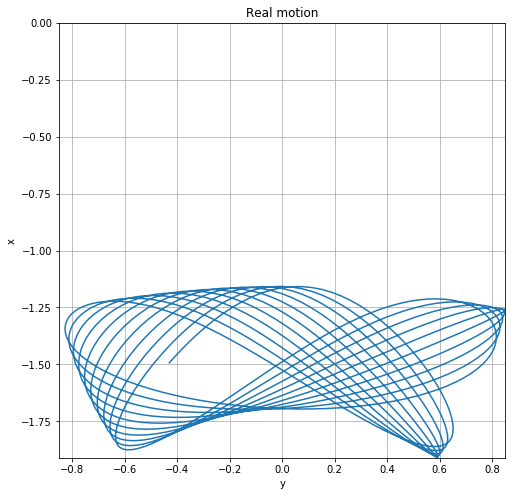

In [14]:
# Plot positions

plt.close()
plt.figure(figsize=(8,8))
plt.plot(x, y,"-")
plt.xlabel('y')
plt.ylabel('x')
plt.title('Real motion')
plt.axis([-np.abs(x).max(), np.abs(x).max(), -np.abs(y).max(), 0]) # plt.axis([xmin, xmax, ymin, ymax])
plt.grid()
plt.show()

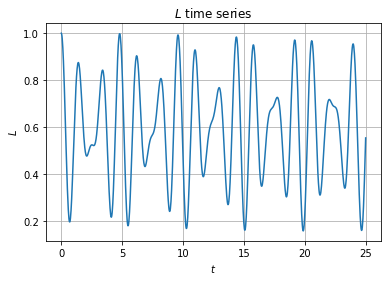

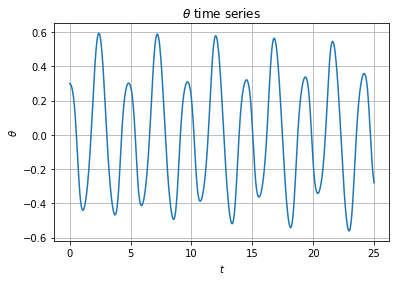

In [15]:
# Plot time series

plt.close()
plt.title(r'$L$ time series')
plt.plot(t, L,"-")
plt.xlabel(r'$t$')
plt.ylabel(r'$L$')
plt.grid()
plt.show()

plt.close()
plt.title(r'$\theta$ time series')
plt.plot(t, theta,"-")
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.grid()
plt.show()

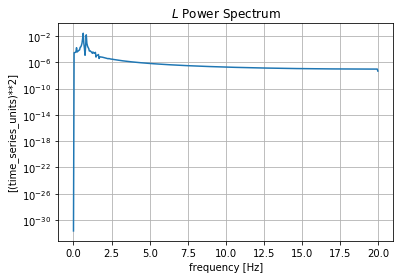

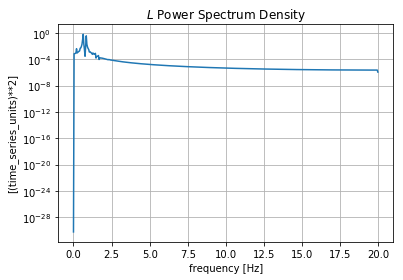

In [18]:
# Power spectrum and Power spectrum density for L time series.

time_series = L
fourier = np.fft.fft(time_series)
n = time_series.size
timestep = (tf-ti)/(Nt-1)

plt.close()
f, Pxx = signal.periodogram(time_series, 1./timestep, scaling='spectrum')
plt.semilogy(f, Pxx)
plt.title(r'$L$ Power Spectrum')
plt.xlabel('frequency [Hz]')
plt.ylabel('[(time_series_units)**2]')
plt.grid()
plt.show()

plt.close()
f, Pxx_den = signal.periodogram(time_series, 1./timestep, scaling='density')
plt.semilogy(f, Pxx_den)
plt.title(r'$L$ Power Spectrum Density')
plt.xlabel('frequency [Hz]')
plt.ylabel('[(time_series_units)**2]')
plt.grid()
plt.show()

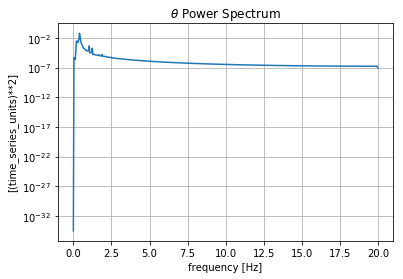

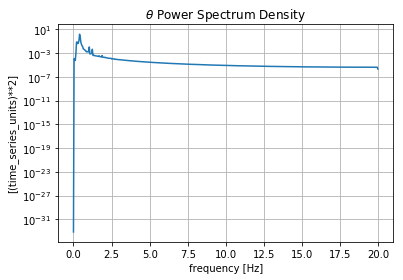

In [17]:
# Power spectrum and Power spectrum density for THETA time series.

time_series = theta
fourier = np.fft.fft(time_series)
n = time_series.size
timestep = (tf-ti)/(Nt-1)

plt.close()
f, Pxx = signal.periodogram(time_series, 1./timestep, scaling='spectrum')
plt.semilogy(f, Pxx)
plt.title(r'$\theta$ Power Spectrum')
plt.xlabel('frequency [Hz]')
plt.ylabel('[(time_series_units)**2]')
plt.grid()
plt.show()

plt.close()
f, Pxx_den = signal.periodogram(time_series, 1./timestep, scaling='density')
plt.semilogy(f, Pxx_den)
plt.title(r'$\theta$ Power Spectrum Density')
plt.xlabel('frequency [Hz]')
plt.ylabel('[(time_series_units)**2]')
plt.grid()
plt.show()

### Disccussion

It seems we have only found periodic regime. If we still trying out with different values for **ALL** the parameters, it will require a huge effort. So we need an smarter method to perform it, and the very best way is first to nondimensionalize the system.

### Dimensionless system



In [8]:
a, b, c, d = symbols('a, b, c, d', real=True)
nonlinsolve([a**2 + a, a - b], [a, b])

{(-1, -1), (0, 0)}